In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [23]:
# Cargar el dataset
data = pd.read_csv('/content/drive/MyDrive/UBA/Trabajo de grado/dataset_wide.csv')

  # Mostrar las primeras filas del dataset
print(data.head())

          P         D          L          R P_fuzzy_set  P_membership  \
0  0.045553  0.608390 -18.517306  67.099168          ok      0.886118   
1 -0.979829  0.468399  62.832204  -7.498536   muy lejos      0.966382   
2  0.968055  0.035674 -34.584612 -12.701870   muy cerca      0.946758   
3  0.402764  0.032081 -71.360223  77.859054       cerca      0.995394   
4 -0.503925  0.629578  61.566158  16.442472       lejos      0.826791   

   D_fuzzy_set  D_membership                  L_fuzzy_set  L_membership  \
0  acercandose      1.000000        muy lento hacia atrás      0.574135   
1  acercandose      1.000000    rápidamente hacia delante      0.858390   
2   sin cambio      0.821631        despacito hacia atrás      0.541539   
3   sin cambio      0.839593  bastante rápido hacia atrás      0.784006   
4  acercandose      1.000000    rápidamente hacia delante      0.921692   

                     R_fuzzy_set  R_membership  \
0      rápidamente hacia delante      0.645042   
1         

In [24]:
X = data[['P','D','L','R','CAT','P_fuzzy_set', 'D_fuzzy_set', 'L_fuzzy_set', 'R_fuzzy_set']]
y = data['FRASE']
#z = data[['P_fuzzy_set', 'D_fuzzy_set', 'L_fuzzy_set', 'R_fuzzy_set']].apply(lambda x: ' '.join(x), axis=1)

In [25]:
with open('/content/drive/MyDrive/UBA/Trabajo de grado/corpus.txt', 'r') as f:
    text = f.readlines()
# Remueve los caracteres de salto de línea y los reemplaza por espacios en blanco
#text = text.replace('\n', ' ')

In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(text)
num_decoder_tokens = len(tokenizer.word_index) + 1

In [27]:
from sklearn.model_selection import train_test_split

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = data['CAT'], test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en conjunto de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

'''
# Obtener el índice de las filas de X_train, X_val y X_test
idx_train = X_train.index
idx_val = X_val.index
idx_test = X_test.index
'''

'\n# Obtener el índice de las filas de X_train, X_val y X_test\nidx_train = X_train.index\nidx_val = X_val.index\nidx_test = X_test.index\n'

In [28]:
z_train = X_train[['P_fuzzy_set', 'D_fuzzy_set', 'L_fuzzy_set', 'R_fuzzy_set']].apply(lambda x: ' '.join(x), axis=1)
z_val = X_val[['P_fuzzy_set', 'D_fuzzy_set', 'L_fuzzy_set', 'R_fuzzy_set']].apply(lambda x: ' '.join(x), axis=1)
z_test = X_test[['P_fuzzy_set', 'D_fuzzy_set', 'L_fuzzy_set', 'R_fuzzy_set']].apply(lambda x: ' '.join(x), axis=1)

X_train = X_train[['P','D','L','R']].values
X_val = X_val[['P','D','L','R']].values
X_test = X_test[['P','D','L','R']].values

In [29]:
y_train_tokenized = tokenizer.texts_to_sequences(y_train)
y_val_tokenized = tokenizer.texts_to_sequences(y_val)
y_test_tokenized = tokenizer.texts_to_sequences(y_test)

In [30]:
z_train = tokenizer.texts_to_sequences(z_train)
z_val = tokenizer.texts_to_sequences(z_val)
z_test = tokenizer.texts_to_sequences(z_test)

In [31]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 40
y_train_tokenized = pad_sequences(y_train_tokenized, maxlen=max_len, padding='post', truncating='post')
y_val_tokenized = pad_sequences(y_val_tokenized, maxlen=max_len, padding='post', truncating='post')
y_test_tokenized = pad_sequences(y_test_tokenized, maxlen=max_len, padding='post', truncating='post')
z_train = pad_sequences(z_train, maxlen=max_len, padding='post', truncating='post')
z_val = pad_sequences(z_val, maxlen=max_len, padding='post', truncating='post')
z_test = pad_sequences(z_test, maxlen=max_len, padding='post', truncating='post')

In [32]:
y_train_tokenized = np.array(y_train_tokenized)
y_val_tokenized = np.array(y_val_tokenized)
y_test_tokenized = np.array(y_test_tokenized)
z_train =np.array(z_train)
z_val = np.array(z_val)
z_test = np.array(z_test)

In [33]:
from sklearn.preprocessing import StandardScaler

# Ajusta las columnas numéricas con StandardScaler
scaler_values = StandardScaler()

scaler_values.fit(data[['P','D','L','R']].values)

StandardScaler()

In [34]:
X_train_scaled = scaler_values.transform(X_train)
X_val_scaled =scaler_values.transform(X_val)
X_test_scaled =scaler_values.transform(X_test)

In [35]:
print('tamaño X train_scaled', X_train_scaled.shape)
print('tamaño y train', y_train_tokenized.shape)
print('tamaño z train', z_train.shape)


print('tamaño X val_scaled', X_val_scaled.shape)
print('tamaño y val', y_val_tokenized.shape)
print('tamaño z val_scaled', z_val.shape)

print('tamaño X test_scaled', X_test_scaled.shape)
print('tamaño y test', y_test_tokenized.shape)
print('tamaño z test', z_test.shape)

tamaño X train_scaled (5999, 4)
tamaño y train (5999, 40)
tamaño z train (5999, 40)
tamaño X val_scaled (2000, 4)
tamaño y val (2000, 40)
tamaño z val_scaled (2000, 40)
tamaño X test_scaled (2000, 4)
tamaño y test (2000, 40)
tamaño z test (2000, 40)


In [36]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Definir callbacks
callbacks = [
    #ModelCheckpoint(filepath='modelo_ep{epoch:02d}_loss{val_loss:.4f}.h5',
    #                monitor='val_loss',
    #                save_best_only=True,
    #                mode='min',
    #                save_weights_only=True,
    #                verbose=1),
    EarlyStopping(monitor='val_loss',
                  patience=4,
                  verbose=1)
]

In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Embedding

# Definir dimension de entrada para el encoder
encoder_inputs = Input(shape=(1, 4))

# Capa LSTM  en el encoder
encoder_lstm = LSTM(256, return_state=True)
encoder_output, state_h, state_c = encoder_lstm(encoder_inputs)

# Se descartan las salidas del encoder y solo se toman los estados
encoder_states = [state_h, state_c]


In [66]:
# Definir dimension de entrada para el decoder
decoder_inputs = Input(shape=(None,))

# Capa de embedding en el decoder
decoder_embedding = Embedding(max_len, output_dim=50)
decoder_inputs_embedded = decoder_embedding(decoder_inputs)

# Capa LSTM 1 en el decoder, con los estados del encoder como inicialización
decoder_lstm1 = LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm1(decoder_inputs_embedded, initial_state=encoder_states)

# Capa densa con activación softmax en el output
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Definir modelo encoder-decoder
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')


In [67]:
history = model.fit([X_train_scaled.reshape(X_train_scaled.shape[0],1,4), z_train], 
    y_train_tokenized.reshape(y_train_tokenized.shape[0], y_train_tokenized.shape[1], 1),
     batch_size=64, 
     epochs=200, 
     validation_data=([X_val_scaled.reshape(X_val.shape[0],1,4), z_val], y_val_tokenized.reshape(y_val_tokenized.shape[0], y_val_tokenized.shape[1], 1)))

loss = history.history['loss']
val_loss = history.history['val_loss']

Epoch 1/200
94/94 [==============================] - 7s 18ms/step - loss: 2.7816 - val_loss: 2.3297
Epoch 2/200
94/94 [==============================] - 1s 9ms/step - loss: 2.1768 - val_loss: 2.0322
Epoch 3/200
94/94 [==============================] - 1s 9ms/step - loss: 1.9268 - val_loss: 1.8091
Epoch 4/200
94/94 [==============================] - 1s 9ms/step - loss: 1.7422 - val_loss: 1.6747
Epoch 5/200
94/94 [==============================] - 1s 9ms/step - loss: 1.6094 - val_loss: 1.6100
Epoch 6/200
94/94 [==============================] - 1s 9ms/step - loss: 1.5195 - val_loss: 1.4901
Epoch 7/200
94/94 [==============================] - 1s 12ms/step - loss: 1.4610 - val_loss: 1.4290
Epoch 8/200
94/94 [==============================] - 1s 12ms/step - loss: 1.3941 - val_loss: 1.3931
Epoch 9/200
94/94 [==============================] - 1s 13ms/step - loss: 1.3377 - val_loss: 1.3160
Epoch 10/200
94/94 [==============================] - 1s 9ms/step - loss: 1.2991 - val_loss: 1.3180
Epoch

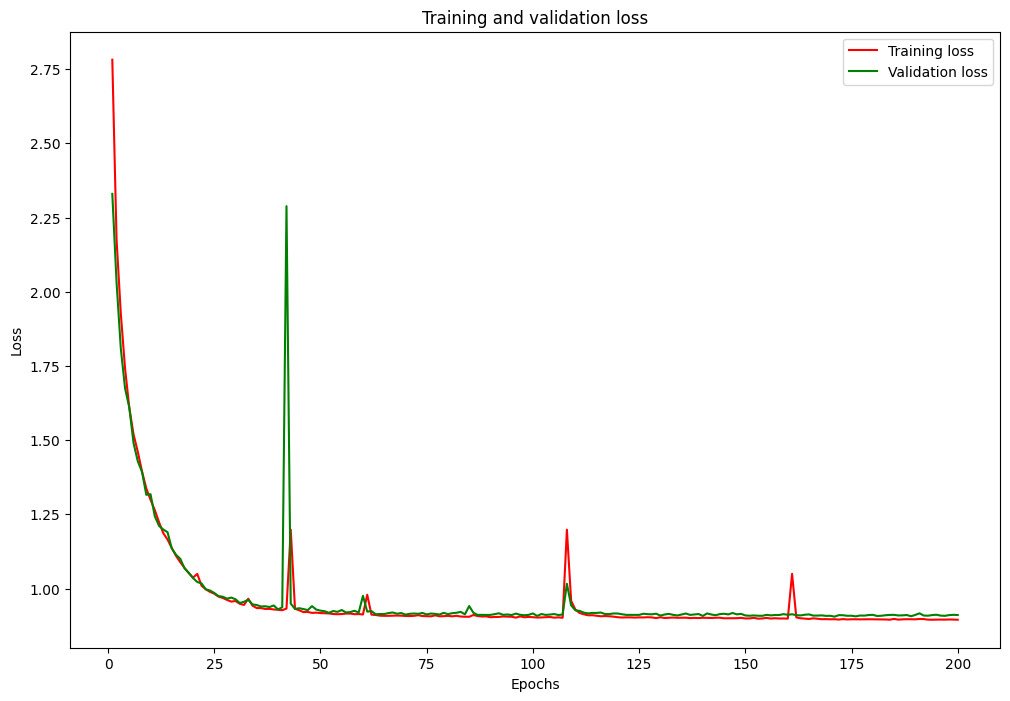

In [68]:
import matplotlib.pyplot as plt

# Crear el gráfico
plt.figure(figsize=(12, 8))
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='r', label='Training loss')
plt.plot(epochs, val_loss, color='g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
model.evaluate([X_test.reshape(X_test.shape[0],1,4),z_test])

63/63 [==============================] - 1s 2ms/step - loss: 0.0000e+00


0.0

In [70]:
def predictions(preds):
    preds_words = []
    for i in range(preds.shape[0]):
        preds_row = preds[i]
        preds_row_words = []
        for idx in preds_row:
            if idx in tokenizer.index_word:
                preds_row_words.append(tokenizer.index_word[idx])
        preds_words.append(preds_row_words)

    return preds_words

In [71]:
preds = model.predict([X_test.reshape(X_test.shape[0],1,4), z_test])


63/63 [==============================] - 1s 6ms/step


In [72]:
preds = np.argmax(preds, axis=-1)

In [73]:
frasesnlg = predictions(preds)
print(frasesnlg)

[['en', 'estés', 'de', 'la', 'estés', 'a', 'pero', 'te', 'estás', 'estás', 'de', 'de', 'pared', 'tu', 'tu', 'tu', 'izquierda', 'lento', 'hacia', 'delante', 'delante', 'la', 'la', 'la', 'rápidamente', 'derecha', 'derecha'], ['muy', 'estés', 'encuentras', 'cerca', 'cerca', 'la', 'pared', 'pared', 'no', 'te', 'ni', 'más', 'ella', 'girar', 'alejas', 'la', 'ella', 'gires', 'hacia', 'atrás', 'y', 'la', 'rueda', 'atrás', 'y', 'la', 'misma', 'la', 'hacia', 'despacito', 'hacia', 'atrás'], ['si', 'estás', 'muy', 'muy', 'la', 'la', 'pared', 'y', 'te', 'de', 'de', 'de', 'ella', 'tu', 'rueda', 'izquierda', 'hacia', 'hacia', 'atrás', 'y', 'gira', 'tu', 'atrás', 'la', 'misma', 'hacia', 'atrás'], ['en', 'estés', 'de', 'que', 'de', 'pared', 'y', 'y', 'estás', 'alejando', 'alejando', 'de', 'ella', 'gira', 'tu', 'rueda', 'girar', 'la', 'rueda', 'izquierda', 'bastante', 'y', 'hacia', 'adelante', 'mientras', 'derecha', 'despacito', 'despacito', 'atrás'], ['en', 'estén', 'a', 'la', 'distancia', 'requerida',

# guardar el modelo y cargarlo despues

In [ ]:
# Guarda el modelo
model.save('/content/drive/MyDrive/UBA/Trabajo de grado/Modelos/NLG_GeNeSys_vocab_limi.h5')